Importing libs and creating a dataset

In [1]:
import pandas as pd
import numpy as np

### Создаем датасет

Inputs

In [2]:
np.random.seed(112312)
n_students = 1000

В результате выполнения этого кода мы получим датасет, содержащий информацию о 1000 студентах
Одна запись датасета имеет несколько полей:
1. age - возраст студента
2. gender - пол студента
3. gpa - средний балл
4. major - специальность

Genders:
0 - Male
1 - Female

Majors:
0 - Math
1 - Physics
2 - Chemistry
3 - Biology

In [3]:
class Genders:
    MALE = 0
    FEMALE = 1


class Majors:
    MATH = 0
    PHYSICS = 1
    CHEMISTRY = 2
    BIOLOGY = 3

In [4]:
rating = np.random.normal(3.5, 1, n_students)
students = pd.DataFrame({
    'age': np.random.normal(20, 2, n_students),
    'gender': np.random.choice([Genders.MALE, Genders.FEMALE], n_students),
    # gpa - средний балл
    'gpa': np.random.normal(3.5, 0.3, n_students),
    # major - специальность
    'major': np.random.choice([Majors.MATH, Majors.PHYSICS, Majors.CHEMISTRY, Majors.BIOLOGY], n_students)
})



### Получение основной информации о данных:

In [5]:
# Количество наблюдений и переменных
print("Количество наблюдений:", students.shape[0])
print("Количество переменных:", students.shape[1])

# Типы данных и количество пропущенных значений
print(students.info())

# Количество пропущенных значений
print("Количество пропущенных значений:n", students.isnull().sum())

Количество наблюдений: 1000
Количество переменных: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1000 non-null   float64
 1   gender  1000 non-null   int32  
 2   gpa     1000 non-null   float64
 3   major   1000 non-null   int32  
dtypes: float64(2), int32(2)
memory usage: 23.6 KB
None
Количество пропущенных значений:n age       0
gender    0
gpa       0
major     0
dtype: int64


### Вычисление основных статистических характеристик данных:

Средние значения

In [6]:
print(students.mean())

age       20.030460
gender     0.492000
gpa        3.520337
major      1.505000
dtype: float64


Дисперсии

In [7]:
print(students.var())

age       4.263975
gender    0.250186
gpa       0.092217
major     1.251226
dtype: float64


Минимумы

In [8]:
print(students.min())

age       12.870987
gender     0.000000
gpa        2.510537
major      0.000000
dtype: float64


Максимумы

In [9]:
print(students.max())

age       26.288536
gender     1.000000
gpa        4.722976
major      3.000000
dtype: float64


Квартили

In [10]:
print(students.quantile([0.25, 0.5, 0.75]))

            age  gender       gpa  major
0.25  18.637489     0.0  3.300258    1.0
0.50  20.061621     0.0  3.529795    1.0
0.75  21.404518     1.0  3.725540    3.0


Корреляции

In [11]:
print(students.corr())

             age    gender       gpa     major
age     1.000000  0.029840  0.012945  0.044914
gender  0.029840  1.000000 -0.019188  0.006333
gpa     0.012945 -0.019188  1.000000 -0.097600
major   0.044914  0.006333 -0.097600  1.000000


### Нарисовать гистограммы и боксплоты:

In [12]:
import matplotlib.pyplot as plt

Гистограммы


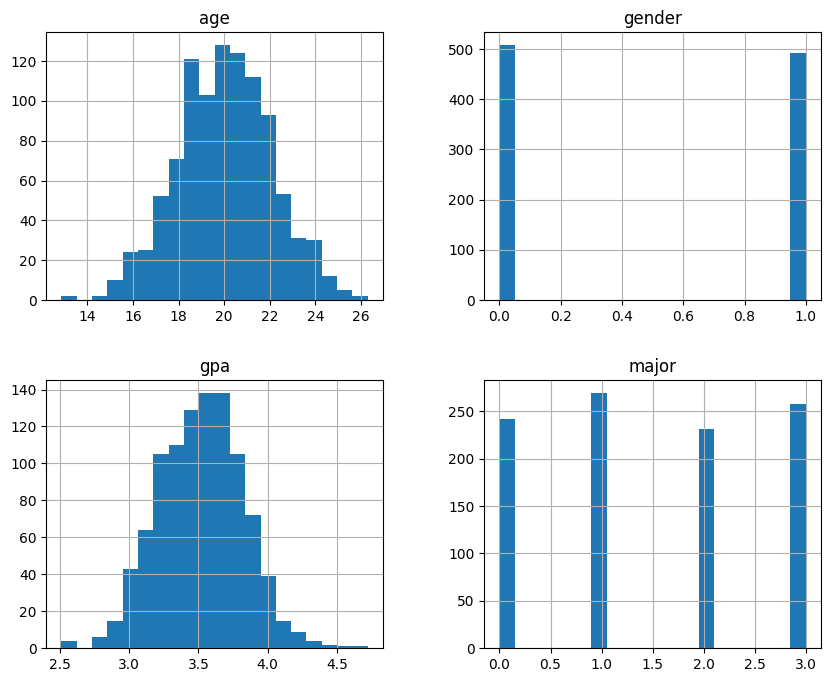

In [13]:
students.hist(bins=20, figsize=(10, 8))
plt.show()

Боксплоты

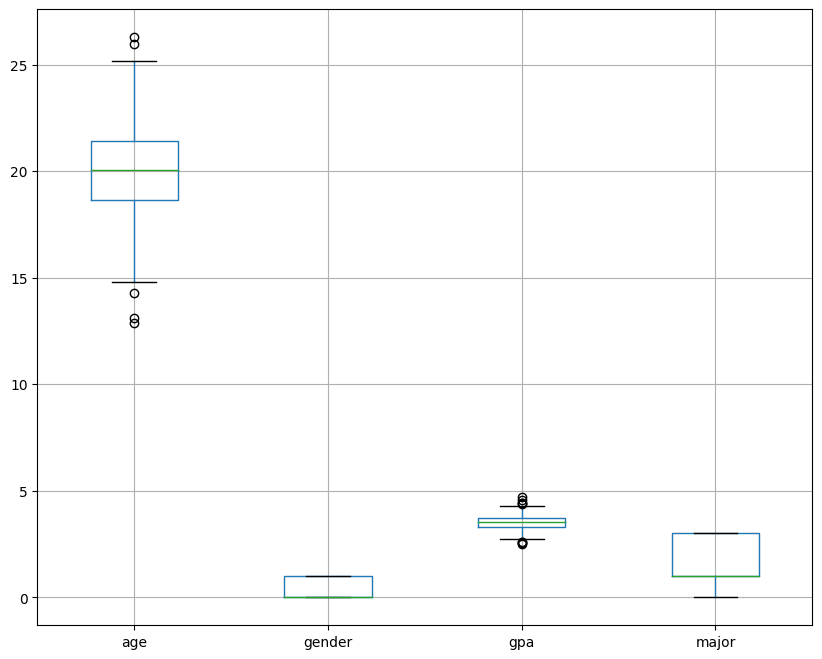

In [14]:
students.boxplot(figsize=(10, 8))
plt.show()

 ### Определение выбросов:

In [15]:
Q1 = students.quantile(0.25)
Q3 = students.quantile(0.75)
IQR = Q3 - Q1
outliers = ((students < (Q1 - 1.5 * IQR)) | (students > (Q3 + 1.5 * IQR))).sum()
print("Количество выбросов:\n", outliers)

Количество выбросов:
 age       5
gender    0
gpa       9
major     0
dtype: int64


### Проверка гипотезы:
Пример проверки гипотезы о равенстве средних значений двух выборок

In [16]:
from scipy.stats import ttest_ind

math_gpa = students[students['major'] == Majors.MATH]['gpa']
physics_gpa = students[students['major'] == Majors.PHYSICS]['gpa']

t_stat, p_value = ttest_ind(math_gpa, physics_gpa)
print("t-статистика:", t_stat)
print("p-значение:", p_value)

t-статистика: 2.3867897894013455
p-значение: 0.01736042803622747


### Построение линейной регрессии

In [17]:
from scipy.stats import linregress

x = students['age']
y = students['gpa']

slope, intercept, r_value, p_value, std_err = linregress(x, y)

print("Коэффициенты регрессии:", slope)
print("Свободный член:", intercept)
print("p-значение:", p_value)


Коэффициенты регрессии: 0.0019036526584727395
Свободный член: 3.4822059420601086
p-значение: 0.6826498116134554
